## Activation Functions Intro

We use **activation functions** because, if the activation function itself is nonlinear, it allows for neural networks map nonlinear functions. 

<br>

In general, your neural network will have two types of activation functions. 
- The first type will be the activation function used in hidden layers (usually will be the same for all of them). 
- The second type will be used in the output layer.

## The Sigmoid Activation Function



Returns a value in the range of: 
- 0 for negative infinity
- through 0.5 for the input of 0
- to 1 for positive infinity


![](https://drive.google.com/uc?id=17laVogv5ny9jS_QO8aXDlsI5FBOwGuMt)

<br>

This function, historically used in hidden layers, was eventually replaced by the **Rectified Linear Units** activation function (**ReLU**). 

That said, later on (not in this notebook) we will show an example where we use the Sigmoid function as the final output layer’s activation function.

## The Rectified Linear Activation Function

This simple yet powerful activation function is the most widely used activation function at the time of writing for various reasons — mainly speed and efficiency. 

The ReLU activation function is extremely close to being a linear activation
function while remaining nonlinear, due to that bend after 0. This simple property is, however, very effective.

![](https://drive.google.com/uc?id=1bv57587yWhRhln8z9otLWNOPQ3d-YNy9)

## RELU with Single Neuron

### Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def relu(val):
    return max(0, val)

In [3]:
def neuron(input, weight, bias):

    output = []
    for i in input:
        neuron_output = (i * weight) + bias

        output.append({          
            'input': i,
            'output': relu(neuron_output),
            'desc': f'max(0, ({i:.2f} * {weight}) + {bias})'
        })
    
    return output


In [4]:
def plot_neuron(
    input,
    weight,
    bias,    
    xlim, 
    ylim,
    inputs_to_highlight,
    annotation_y_offsets
):
    output = neuron(
        input=input,
        weight=weight,
        bias=bias
    )

    plt.figure(figsize=(8, 8), dpi=80)    

    plt.plot(
        input,
        [o['output'] for o in output]    
    )

    # -- ------------------------------
    colors = ['red', 'green', 'blue']    
    for idx, example_input in enumerate(inputs_to_highlight[:len(colors)]):
        example_output = neuron(
            input=[example_input],
            weight=weight,
            bias=bias
        )[0]
        
        plt.annotate(
            f'{example_output["desc"]} = {example_output["output"]:.1f}', 
            xy=(example_input, example_output['output']), 
            xytext=(example_input, example_output['output']-annotation_y_offsets[idx]), 
            arrowprops=dict(facecolor=colors[idx])            
        )


    plt.grid(axis = 'both')
    plt.title(f"Single Neuron\nf(x) = max(0, x * weight + bias)")
    plt.xlabel('Input to Single Neuron')
    plt.ylabel('Output')
    
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.show()

### weight = 0 and bias = 0

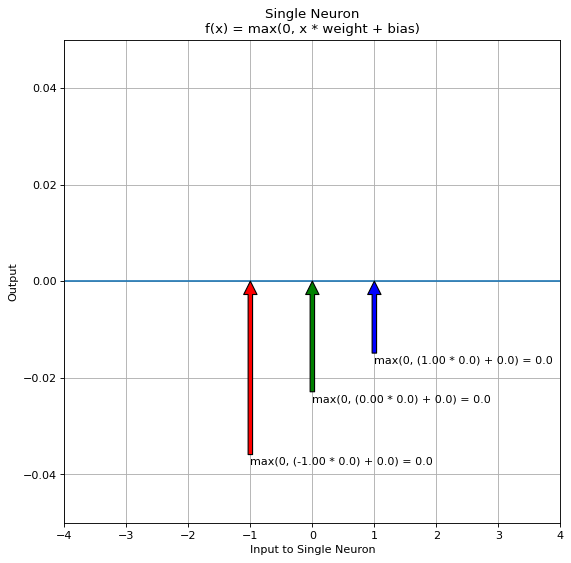

In [5]:
plot_neuron(
    input=np.arange(-5.0, 5.0, 0.1),
    weight=0.0,
    bias=0.0,    
    xlim=(-4, 4),
    ylim=(-.05, .05),
    inputs_to_highlight=[-1, 0, 1],
    annotation_y_offsets=[.038, .025, .017]
)

### weight = 1 and bias = 0

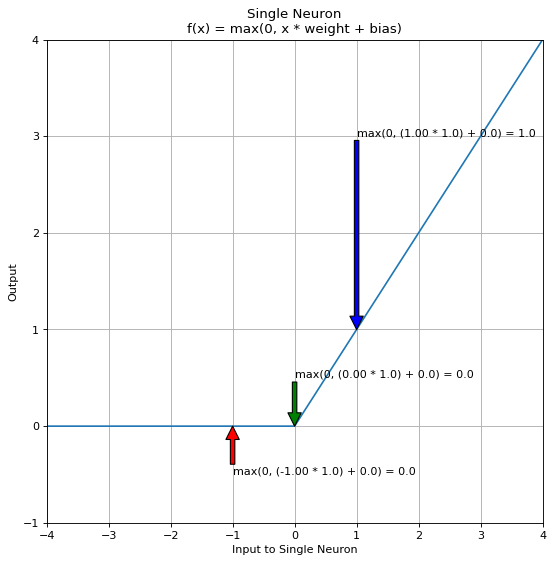

In [6]:
plot_neuron(
    input=np.arange(-5.0, 5.0, 0.1),
    weight=1.0,
    bias=0.0,    
    xlim=(-4, 4),
    ylim=(-1, 4),
    inputs_to_highlight=[-1, 0, 1],
    annotation_y_offsets=[.5, -.5, -2]
)

### weight = 1 and bias = 0.5

We can see that in this case, with a **single** neuron, the bias offsets the overall function’s activation point **horizontally**.

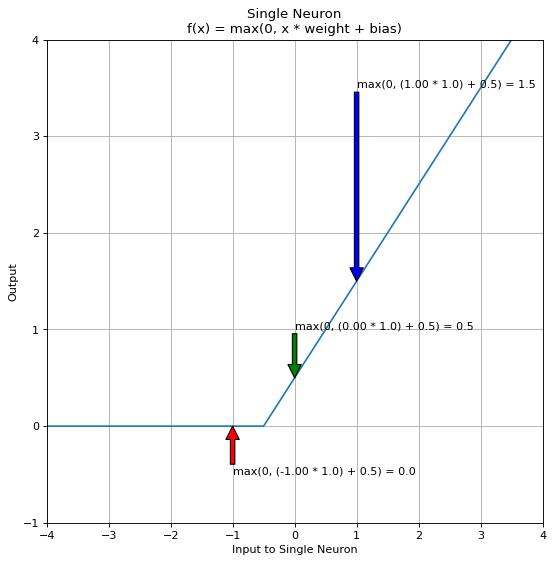

In [7]:
plot_neuron(
    input=np.arange(-5.0, 5.0, 0.1),
    weight=1.0,
    bias=0.5,    
    xlim=(-4, 4),
    ylim=(-1, 4),
    inputs_to_highlight=[-1, 0, 1],
    annotation_y_offsets=[.5, -.5, -2]
)

### weight = -1 and bias = 0.5

With a **negative weight** and this single neuron, the function has become a question of when this neuron **deactivates**. 

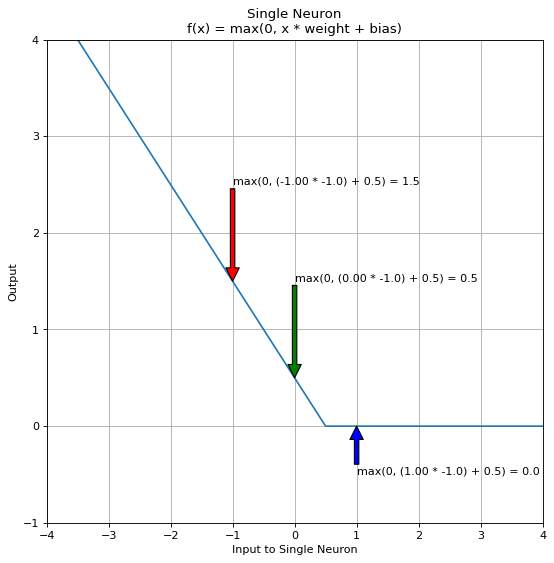

In [8]:
plot_neuron(
    input=np.arange(-5.0, 5.0, 0.1),
    weight=-1.0,
    bias=0.5,    
    xlim=(-4, 4),
    ylim=(-1, 4),
    inputs_to_highlight=[-1, 0, 1],
    annotation_y_offsets=[-1, -1, .5]
)

## RELU with Two Successive Neurons




### Code

In [9]:
def plot_two_neurons(
    input,
    neuron_1_weight,
    neuron_1_bias,
    neuron_2_weight,
    neuron_2_bias,    
    xlim, 
    ylim,
    inputs_to_highlight,
    annotation_y_offsets
):

    # -- ------------------------------
    plt.figure(figsize=(8, 8), dpi=80)  

    # -- ------------------------------
    # Neuron 1 with its own input
    output_neuron_1 = neuron(
        input=input,
        weight=neuron_1_weight,
        bias=neuron_1_bias
    )

    plt.plot(
        input,
        [o['output'] for o in output_neuron_1],
        color='#558b2f',
        label=f"Neuron 1 by itself with its own input",
        linestyle='--' 
    )

    # -- ------------------------------
    # Neuron 2 with its own input        
    plt.plot(
        input,
        [o['output'] for o in neuron(input=input, weight=neuron_2_weight, bias=neuron_2_bias)],
        color='#03a9f4',
        label=f"Neuron 2 by itself with its own input",
        linestyle='--'    
    )

    # -- ------------------------------
    # Both neurons successively
    output_neuron_2 = neuron(
        input=[o['output'] for o in output_neuron_1] ,
        weight=neuron_2_weight,
        bias=neuron_2_bias
    )

    plt.plot(
        input,
        [o['output'] for o in output_neuron_2],
        color='red',
        label=f"Both neurons successively"    
    )

    # -- ------------------------------      
    for idx, example_input in enumerate(inputs_to_highlight):

        example_output_neuron_1 = neuron(
            input=[example_input],
            weight=neuron_1_weight,
            bias=neuron_1_bias
        )[0]
        n1_output = example_output_neuron_1['output']
        n1_desc = example_output_neuron_1['desc']        

        example_output_neuron_2 = neuron(
            input=[n1_output] ,
            weight=neuron_2_weight,
            bias=neuron_2_bias
        )[0]
        n2_output = example_output_neuron_2['output']
        n2_desc = example_output_neuron_2['desc']             
        
        plt.annotate(
            f'{n1_desc} = {n1_output:.1f} --> {n2_desc} = {n2_output:.1f}', 
            xy=(example_input, n2_output), 
            xytext=(example_input, n2_output - annotation_y_offsets[idx]), 
            arrowprops=dict(facecolor='#cb3b38')            
        )


    plt.grid(axis = 'both')
    plt.title(f"Two Successive Neurons\nEach neuron = f(x) = max(0, x * weight + bias)")
    plt.xlabel('Input')
    plt.ylabel('Ouput')
    plt.legend(loc='lower left')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.show()


### Example 1

```
neuron_1_weight = -1.0
neuron_1_bias   =  0.5
neuron_2_weight =  1.0
neuron_2_bias   =  1.0   
```

The bias of the second neuron indeed shifted the overall function, but, rather than shifting it horizontally, it shifted the function **vertically**.

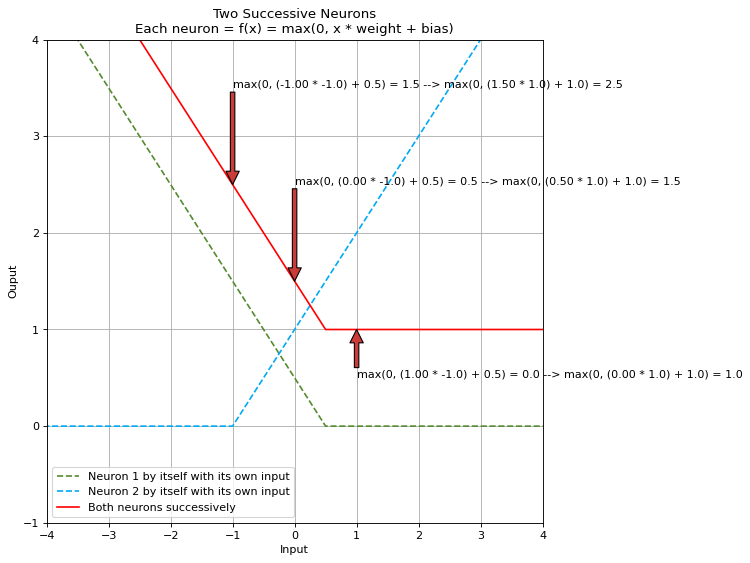

In [10]:
plot_two_neurons(
    input=np.arange(-5.0, 5.0, 0.1),
    neuron_1_weight=-1.0,
    neuron_1_bias=0.5,
    neuron_2_weight=1.0,
    neuron_2_bias=1.0,   
    xlim=(-4, 4),
    ylim=(-1, 4),
    inputs_to_highlight=[-1, 0, 1],
    annotation_y_offsets=[-1, -1, .5]
)

### Example 2

```
neuron_1_weight = -1.0
neuron_1_bias   =  0.5
neuron_2_weight = -2.0
neuron_2_bias   =  1.0   
```

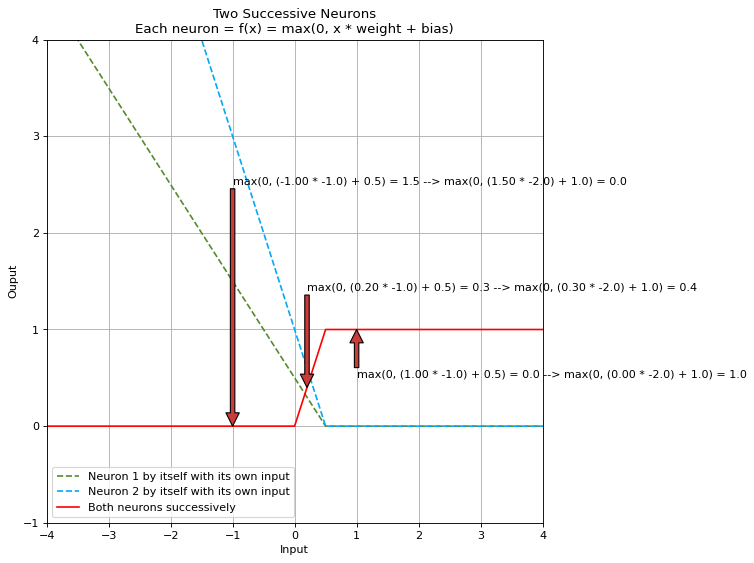

In [11]:
plot_two_neurons(
    input=np.arange(-5.0, 5.0, 0.1),
    neuron_1_weight=-1.0,
    neuron_1_bias=0.5,
    neuron_2_weight=-2.0,
    neuron_2_bias=1.0,   
    xlim=(-4, 4),
    ylim=(-1, 4),
    inputs_to_highlight=[-1, .2, 1],
    annotation_y_offsets=[-2.5, -1, .5]
)

Something exciting has occurred! 

In this example, we have both an **activation** and a **deactivation** point. 

We see their "area of effect" comes into play:
- When `input <= 0` only Neuron-1 is activated and firing
- When `0 < input < .5` both neurons are activated and firing
- When `input >= .5` only Neuron-2 is activated and firing 


In [12]:
from IPython.display import Image

In [13]:
Image(url='https://drive.google.com/uc?id=17i2pZmnCBABm3sdZQ1bcsmjQTOksETp2')

## Sine Wave Example

Let’s now take this concept and use it to fit to the sine wave function using 2 hidden layers of 8 neurons each. 

Note, this is for illustrative purposes, to highlight what activation functions now allow us to do.  

For simplicity, we are also going to assume that the layers are not densely connected, and each neuron from the first hidden layer connects to only one neuron from the second hidden layer. That’s usually not the case with the real models, but we want this simplification for the purpose of this demo. 

This example model takes a single value as an input, the input to the sine function, and outputs a single value like the sine function. 

The output layer uses the Linear activation function, and the hidden layers will use the rectified linear activation function.

In [14]:
Image(url='https://drive.google.com/uc?id=1pcRCaT77fHITs_aV5ZyzbLEec0tCyNrq')